#### Projektaufgabe: Deskriptive Statistik und Visualisierungen
##### Für den Online-Artikel zum Kundenstamm der Bibliothek braucht die Pressestelle einige interessanten Zahlen zum Thema Alter und Bibliotheksnutzung. Außerdem möchte sie die Daten in einer Info-Graphik zusammenstellen.

##### Für eine erste Demo bist Du verantwortlich:

##### Berechne 2-3 Statistiken und erstelle 2-3 Visualisierungen basierend auf den Informationen im Datensatz.
###### Nutze pandas zur Berechnung der Statistiken und seaborn für die Visualisierungen.
###### Lade bis spätestens 25.03.21 Deinen Report in Form eines Jupyter Notebooks in der Dateiablage in Moodle hoch.

###### Beispielfragen, die Du mit dem Datensatz beantworten und visualisieren kannst:
####### Wie viele Senioren und Kinder sind Kunden der San Francisco Public Library?
####### Wie viele Nutzer möchten per Mail informiert werden?
####### Wie alt sind diese Nutzer durchschnittlich im Vergleich zu Nutzern, die per Post informiert werden möchten?
####### Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt? Ist die Streuung zwischen den Gruppen gleich?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

# use sample to generate a random subsample
df = pd.read_csv("/home/katrin/2021-11-29-DL_Katrin_Gaertner/Modul_3/data/Library_Usage.csv", na_values="None")

In [2]:
df.tail(10)

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
423438,0,ADULT,0,0,10 to 19 years,W4,Western Addition,NaN,NaN,z,email,True,2015,True,NaN
423439,1,JUVENILE,0,0,0 to 9 years,N4,Noe Valley/Sally Brunn,NaN,NaN,z,email,True,2015,False,8.0
423440,2,YOUNG ADULT,42,53,10 to 19 years,M4,Merced,June,2014.0,p,phone,False,2011,True,NaN
423441,3,SENIOR,1812,0,75 years and over,C2,Chinatown,July,2016.0,p,phone,False,2012,False,3.0
423442,2,YOUNG ADULT,608,364,10 to 19 years,S7,Sunset,July,2016.0,z,email,True,2003,False,7.0
423443,0,ADULT,291,13,10 to 19 years,P5,Portola,March,2015.0,p,phone,False,2009,False,9.0
423444,0,ADULT,15,11,60 to 64 years,M8,Mission Bay,July,2016.0,z,email,True,2016,False,6.0
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016.0,z,email,True,2014,False,9.0
423446,0,ADULT,26,0,10 to 19 years,M6,Mission,April,2015.0,z,email,True,2003,False,9.0
423447,1,JUVENILE,0,0,0 to 9 years,E7,Eureka Valley/Harvey Milk Memorial,NaN,NaN,a,print,False,2015,False,8.0


### Frage: Wieviele Benutzer sind Kinder (bis 10 Jahre) und wieviele sind Senioren (über 65 Jahre)?

In [3]:
df['Patron Type Definition'].unique()

array(['ADULT', 'SENIOR', 'WELCOME', 'TEACHER CARD', 'JUVENILE',
       'YOUNG ADULT', 'STAFF', 'DIGITAL ACCESS CARD', 'SPECIAL',
       'AT USER ADULT', 'RETIRED STAFF', 'VISITOR', 'BOOKS BY MAIL',
       'AT USER SENIOR', 'FRIENDS FOR LIFE', 'AT USER WELCOME',
       'AT USER TEEN', 'AT USER JUVENILE'], dtype=object)

In [4]:
df['Age Range'].unique()

array(['20 to 24 years', '25 to 34 years', '45 to 54 years',
       '65 to 74 years', '60 to 64 years', '35 to 44 years', nan,
       '55 to 59 years', '10 to 19 years', '0 to 9 years',
       '75 years and over'], dtype=object)

In [5]:
df['Patron Type Definition'].value_counts()

ADULT                  272251
JUVENILE                59208
SENIOR                  41619
YOUNG ADULT             28816
WELCOME                 14931
TEACHER CARD             1782
DIGITAL ACCESS CARD      1744
SPECIAL                   977
STAFF                     862
VISITOR                   415
AT USER ADULT             349
RETIRED STAFF             157
BOOKS BY MAIL              95
AT USER SENIOR             66
AT USER JUVENILE           47
AT USER WELCOME            45
AT USER TEEN               44
FRIENDS FOR LIFE           40
Name: Patron Type Definition, dtype: int64

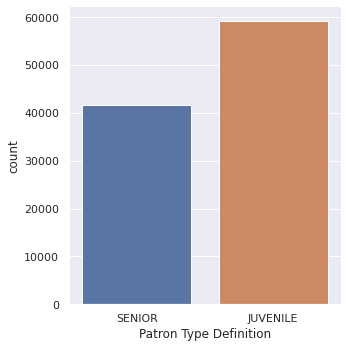

In [6]:
sns.catplot(x='Patron Type Definition', kind='count', 
            data=df[(df['Patron Type Definition'] == 'SENIOR')|
            (df['Patron Type Definition'] == 'JUVENILE')])

#### Es sind 59208 Kinder (0-9 Jahre) und 41619 Senioren registriert.

#### Berechnung Anteil verschiedenen Nutzergruppen an der Gesamtnutzerzahl

<AxesSubplot:xlabel='Proportion', ylabel='Patron Type Definition'>

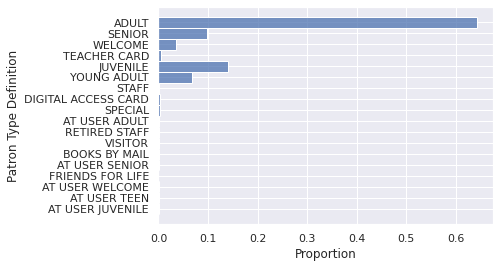

In [7]:
sns.histplot(stat='proportion', data = df, y='Patron Type Definition')

In [8]:
pd.crosstab(
    [df['Patron Type Definition'] == 'JUVENILE'],
    [df['Patron Type Definition'] == 'SENIOR'],
    margins=True, normalize=True)

Patron Type Definition,False,True,All
Patron Type Definition,,,
False,0.761890,0.098286,0.860176
True,0.139824,0.000000,0.139824
All,0.901714,0.098286,1.000000


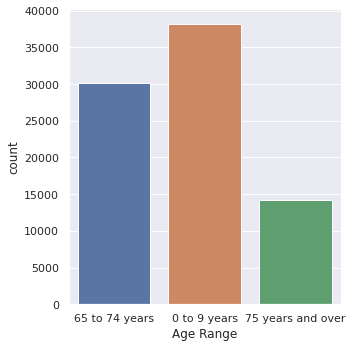

In [9]:
sns.catplot(x='Age Range', kind='count', data=df[(df['Age Range'] == '0 to 9 years')
                                                 |(df['Age Range'] == '65 to 74 years')|
                                                   (df['Age Range'] == '75 years and over')])

In [10]:
(df['Age Range'] == '0 to 9 years').sum()

38242

In [11]:
(df['Patron Type Definition'] == 'SENIOR').sum()+(df['Patron Type Definition'] == 'AT USER SENIOR').sum()

41685

In [12]:
(df['Age Range'] == '75 years and over').sum()

14150

In [13]:
(df['Age Range'] == '65 to 74 years').sum()

30141

In [14]:
(df['Age Range'] == '65 to 74 years').sum() + (df['Age Range'] == '75 years and over').sum()

44291

In [15]:
df['Patron Type Definition'] == 'SENIOR'

0         False
1         False
2         False
3         False
4         False
          ...  
423443    False
423444    False
423445    False
423446    False
423447    False
Name: Patron Type Definition, Length: 423448, dtype: bool

### Wieviele Benutzer möchten per Email benachrichtig werden?

In [16]:
len(df.loc[(df['Notice Preference Definition'] == "email")])

323937

#### 323937 Nutzer möchten per Email benachrichtig werden.

### Wie möchten die Gruppe der Senioren bevorzugt benachrichtigt werden?

### Wieviele der Senioren möchten per Email benachrichtigt werden?

In [17]:
pd.crosstab(
    df['Notice Preference Definition'],
    [df['Patron Type Definition'] == 'SENIOR'],
    margins=True, normalize=1)

Patron Type Definition,False,True,All
Notice Preference Definition,,,
email,0.782332,0.605973,0.764998
none,0.000008,0.000000,0.000007
phone,0.146924,0.290060,0.160993
print,0.070736,0.103967,0.074002


#### 60,6 % der Senioren möchten bevorzugt per Email, 29 % per Telefon und 10 % postalisch benachrichtigt werden.

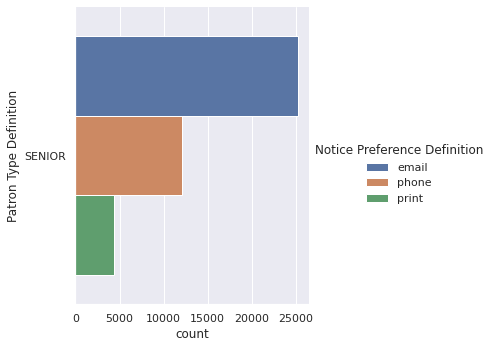

In [18]:
sns.catplot(y='Patron Type Definition', hue='Notice Preference Definition', 
            data=df[df['Patron Type Definition'] == 'SENIOR'], kind='count')

### Welche Bentzergruppe hat eine Email-Adresse angegeben?

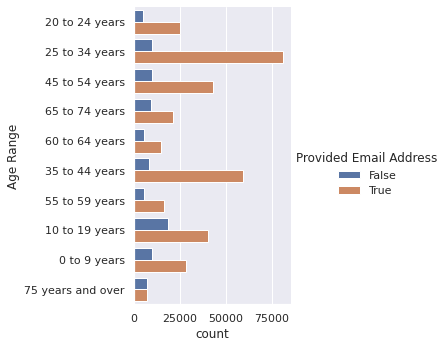

In [19]:
sns.catplot(y='Age Range', hue='Provided Email Address', 
            data=df, kind='count')

#### In der Altersgruppe 25 bis 34 Jahren haben die meisten Benutzer eine Emailadresse angegeben. 